In [ ]:
import pandas as pd
df = pd.read_csv('AbstractDataset_trainSet_FULL.csv')
df.head()

,id,file_name,text,#label
0,1,2111.09381_originalAbstract.txt,"We present MEDCOD, a Medically- Accurate, Emot...",1
1,2,2111.09381_generatedAbstract.txt,"We present MEDCOD, a Medically- Accurate, Emot...",0
2,3,2111.09388_originalAbstract.txt,This work applies Minimum Bayes Risk (MBR) dec...,1
3,4,2111.09388_generatedAbstract.txt,This work applies Minimum Bayes Risk (MBR) dec...,0
4,5,2111.09412_originalAbstract.txt,"In this study, we present a meta-learning mode...",1


In [ ]:
#get the independent features
X = df['text']
#X.head()
#get dependent variables
y = df['#label']
#y.head()

In [ ]:
df.shape

(200, 4)

In [ ]:
#Checking dataset for any missing values and those are dropped
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
df = df.dropna()
#df.head(10)

In [ ]:
#create a copy of this dataset and also reset its index values.
messages = df.copy()
messages.reset_index(inplace = True)
#messages.head(10)

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Stopword removal and Stemming
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus[3]

In [ ]:
df.shape

(200, 4)

In [ ]:
#Apply count vectorizer ( “Bag of Words”). Maximum features passed here are 5000.
#Applying countvectorizer
#Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape 
y =messages['#label']

In [ ]:
#Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 0)
cv.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abbrevi',
 'abil',
 'abl',
 'ablat',
 'ablat studi',
 'absenc',
 'absolut',
 'abstract',
 'abstract larg',
 'abstract md',
 'abstract paper',
 'abstract present',
 'abstract recent',
 'abstract summar',
 'abstract summari',
 'abstractifi',
 'abund',
 'ac',
 'academ',
 'academ write']

In [ ]:
#to get the parameters
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
#converting array into dataframe
count_df = pd.DataFrame(X_train,columns = cv.get_feature_names())
count_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abbrevi,abil,abl,ablat,ablat studi,absenc,absolut,abstract,abstract larg,abstract md,abstract paper,abstract present,abstract recent,abstract summar,abstract summari,abstractifi,abund,ac,academ,academ write,acceler,accent,accept,access,accord,accordingli,account,account liter,accumul,accur,accur predict,accuraci,accuraci loss,acemoglu,achiev,achiev accuraci,achiev better,achiev competit,achiev excel,achiev excel perform,...,yao et,yao et al,ye,ye et,ye et al,year,year increas,yet,yield,ysi,yu,yu et,yu et al,zaheer,zaheer et,zaheer et al,zeng,zeng et,zeng et al,zenodo,zero,zero shot,zero shot perform,zero shot set,zhang,zhang et,zhang et al,zhao,zhao et,zhao et al,zheng,zhong,zhong et,zhong et al,zhou,zhou et,zhou et al,zhu,zhu et,zhu et al
0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,7,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,0,0,0
3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
#else:
  #print('Confusion matrix, without normalization')
#thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

NameError: ignored

Accuracy: 0.197


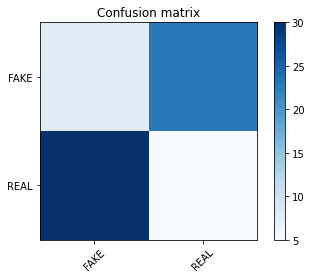

In [ ]:
#classification using Multinomial Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.18181818181818182

Accuracy: 0.318


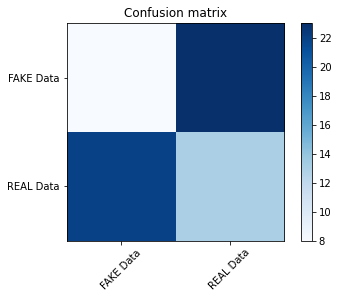

In [ ]:
# classification using Passive Aggressive Classifier Algorithm
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train,y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes = ['FAKE Data','REAL Data'])

In [ ]:
# classification using SVM
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  37.878787878787875


In [ ]:
#classification using Multinomial Classifier with Hyperparameter (alpha)
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.19696969696969696
Alpha: 0.1, Score : 0.16666666666666666
Alpha: 0.2, Score : 0.16666666666666666
Alpha: 0.30000000000000004, Score : 0.18181818181818182
Alpha: 0.4, Score : 0.18181818181818182
Alpha: 0.5, Score : 0.18181818181818182
Alpha: 0.6000000000000001, Score : 0.18181818181818182
Alpha: 0.7000000000000001, Score : 0.19696969696969696
Alpha: 0.8, Score : 0.19696969696969696
Alpha: 0.9, Score : 0.19696969696969696


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
